In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
import os
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-white'])

In [ ]:
!wget --no-check-certificate http://mng.bz/0tIo
!mkdir '/content/dataset'
!unzip "/content/0tIo" -d "/content/dataset"

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/dataset/aclImdb/train/pos/7755_9.txt  
  inflating: /content/dataset/__MACOSX/aclImdb/train/pos/._7755_9.txt  
  inflating: /content/dataset/aclImdb/train/pos/7756_10.txt  
  inflating: /content/dataset/__MACOSX/aclImdb/train/pos/._7756_10.txt  
  inflating: /content/dataset/aclImdb/train/pos/7757_9.txt  
  inflating: /content/dataset/__MACOSX/aclImdb/train/pos/._7757_9.txt  
  inflating: /content/dataset/aclImdb/train/pos/7758_7.txt  
  inflating: /content/dataset/__MACOSX/aclImdb/train/pos/._7758_7.txt  
  inflating: /content/dataset/aclImdb/train/pos/7759_10.txt  
  inflating: /content/dataset/__MACOSX/aclImdb/train/pos/._7759_10.txt  
  inflating: /content/dataset/aclImdb/train/pos/775_7.txt  
  inflating: /content/dataset/__MACOSX/aclImdb/train/pos/._775_7.txt  
  inflating: /content/dataset/aclImdb/train/pos/7760_10.txt  
  inflating: /content/dataset/__MACOSX/aclImdb/train/pos/._7760_10.txt  
  inflating: /content/dataset

In [ ]:
imdb_dir = "/content/dataset/aclImdb"
train_dir = os.path.join(imdb_dir, "train")

labels = []
texts = []
for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)

  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname), encoding='utf8')
      texts.append(f.read())
      f.close()

      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

Train_sample = 300

In [ ]:
max_len = 100
training_samples = 300 # sample 갯수 변경.
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print(len(word_index))

data = pad_sequences(sequences, maxlen = max_len)
labels = np.asarray(labels)

print(data.shape)
print(labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

88582
(25000, 100)
(25000,)
(300, 100)
(300,)
(10000, 100)
(10000,)


In [ ]:
embedding_dim = 100

In [ ]:
model = Sequential()

model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1000000   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                320032    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size = 32,
                    validation_data=(x_val, y_val))

Epoch 1/10
10/10 [==============================] - 1s 75ms/step - loss: 0.6928 - acc: 0.4867 - val_loss: 0.6905 - val_acc: 0.5322
Epoch 2/10
10/10 [==============================] - 1s 61ms/step - loss: 0.5036 - acc: 0.9767 - val_loss: 0.6963 - val_acc: 0.5376
Epoch 3/10
10/10 [==============================] - 1s 57ms/step - loss: 0.2583 - acc: 0.9767 - val_loss: 0.6946 - val_acc: 0.5499
Epoch 4/10
10/10 [==============================] - 1s 58ms/step - loss: 0.1001 - acc: 0.9967 - val_loss: 0.6948 - val_acc: 0.5469
Epoch 5/10
10/10 [==============================] - 1s 59ms/step - loss: 0.0416 - acc: 1.0000 - val_loss: 0.6975 - val_acc: 0.5535
Epoch 6/10
10/10 [==============================] - 1s 58ms/step - loss: 0.0183 - acc: 1.0000 - val_loss: 0.7071 - val_acc: 0.5556
Epoch 7/10
10/10 [==============================] - 1s 58ms/step - loss: 0.0089 - acc: 1.0000 - val_loss: 0.7159 - val_acc: 0.5573
Epoch 8/10
10/10 [==============================] - 1s 56ms/step - loss: 0.0044 - a

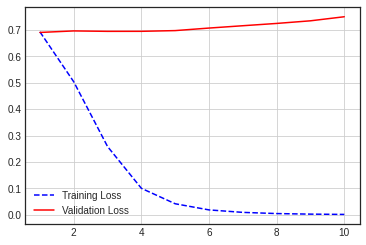

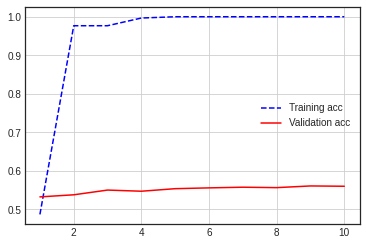

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1 , len(loss) +1)

plt.plot(epochs, loss, 'b--', label="Training Loss")
plt.plot(epochs, val_loss, 'r-', label="Validation Loss")
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label="Training acc")
plt.plot(epochs, val_acc, 'r-', label="Validation acc")
plt.grid()
plt.legend()

plt.show()

In [ ]:
test_dir = os.path.join(imdb_dir, 'test')


labels = []
texts = []
for label_type in ['neg', 'pos']:
  dir_name = os.path.join(test_dir, label_type)

  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname), encoding='utf8')
      texts.append(f.read())
      f.close()

      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)


sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=max_len)
y_test = np.asarray(labels)

In [ ]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.7638 - acc: 0.5526


[0.7637547850608826, 0.5526000261306763]

Train_sample = 1000

In [ ]:
max_len = 100
training_samples = 1000
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print(len(word_index))

data = pad_sequences(sequences, maxlen = max_len)
labels = np.asarray(labels)

print(data.shape)
print(labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

87393
(25000, 100)
(25000,)
(1000, 100)
(1000,)
(10000, 100)
(10000,)


In [ ]:
embedding_dim = 100

In [ ]:
model = Sequential()

model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size = 32,
                    validation_data=(x_val, y_val))

Epoch 1/10
32/32 [==============================] - 1s 28ms/step - loss: 0.6940 - acc: 0.5130 - val_loss: 0.6875 - val_acc: 0.5624
Epoch 2/10
32/32 [==============================] - 1s 24ms/step - loss: 0.4375 - acc: 0.9560 - val_loss: 0.6643 - val_acc: 0.5933
Epoch 3/10
32/32 [==============================] - 1s 25ms/step - loss: 0.1179 - acc: 0.9960 - val_loss: 0.6641 - val_acc: 0.6050
Epoch 4/10
32/32 [==============================] - 1s 26ms/step - loss: 0.0218 - acc: 1.0000 - val_loss: 0.6990 - val_acc: 0.6090
Epoch 5/10
32/32 [==============================] - 1s 25ms/step - loss: 0.0045 - acc: 1.0000 - val_loss: 0.7154 - val_acc: 0.6171
Epoch 6/10
32/32 [==============================] - 1s 24ms/step - loss: 9.8439e-04 - acc: 1.0000 - val_loss: 0.7731 - val_acc: 0.6188
Epoch 7/10
32/32 [==============================] - 1s 24ms/step - loss: 3.8640e-04 - acc: 1.0000 - val_loss: 0.7433 - val_acc: 0.6346
Epoch 8/10
32/32 [==============================] - 1s 27ms/step - loss: 5.

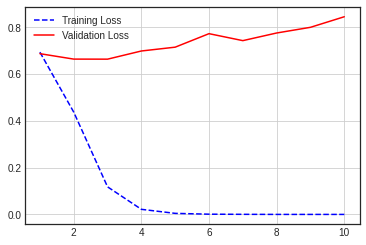

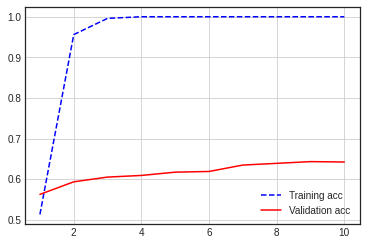

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1 , len(loss) +1)

plt.plot(epochs, loss, 'b--', label="Training Loss")
plt.plot(epochs, val_loss, 'r-', label="Validation Loss")
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label="Training acc")
plt.plot(epochs, val_acc, 'r-', label="Validation acc")
plt.grid()
plt.legend()

plt.show()

In [ ]:
test_dir = os.path.join(imdb_dir, 'test')


labels = []
texts = []
for label_type in ['neg', 'pos']:
  dir_name = os.path.join(test_dir, label_type)

  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname), encoding='utf8')
      texts.append(f.read())
      f.close()

      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)


sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=max_len)
y_test = np.asarray(labels)

In [ ]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.8150 - acc: 0.6561


[0.8150221705436707, 0.6560800075531006]